# Assignment 4

# STEP: 1 -- Introduction

## Objective : As per given columns ,predict income of a person

## Description :

  ### Number of Attributes
  #### 6 continuous, 8 nominal attributes.

  ### Attribute Information:
 age: continuous.
 workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
 
 fnlwgt: continuous.
 
 education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
 
education-num: continuous.

 marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
 occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
 
 relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
 
 race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
 
 sex: Female, Male.
 
 capital-gain: continuous.
 
 capital-loss: continuous.
 
 hours-per-week: continuous.
 
 native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
 
 class: >50K, <=50K

### Missing Attribute Values:
7% have missing values.

### Class Distribution:
 Probability for the label '>50K' : 23.93% / 24.78% (without unknowns)
 Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
 
  

# STEP : 2 -- Import data and display head , shape and description

In [56]:
#importing all the liabraries


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
# removing missing values with NaN


missing=['?','-']
df=pd.read_csv('adultIn.csv',na_values=missing)
df


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# Shape of Dataframe


df.shape

(48842, 15)

In [57]:
# Basic Statstical Description

df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# STEP : 3 -- Discover and Handling Missing Values

In [62]:
# Total no of NaN in an column

d=df.isnull().sum()
d

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [59]:
# Droping all the rows containing missing values

dfx=df.dropna(axis=0)
dfx.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [60]:
# Droping "fnlwgt" column bcoz not needed

dfx.drop(['fnlwgt'],axis=1,inplace=True)

C:\Users\Nikita Singh\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
dfx.head(1)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K


In [63]:
# Showing the percentage of missing value in a column

(d*100)/len(dfx)

age                0.000000
workclass          6.189465
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         6.211578
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.895095
income             0.000000
dtype: float64

In [10]:
dfx.dtypes

age                 int64
workclass          object
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

# STEP : 4 -- Univariate Analysis

### Numerical Columns

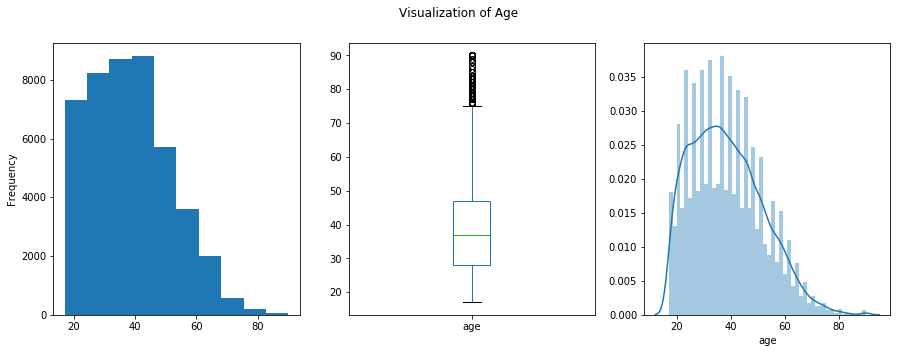

In [64]:
# Visualising age column

fig=plt.figure()
fig.suptitle('Visualization of Age')
plt.subplot(1,3,1)
dfx.age.plot(kind='hist',figsize=(15,5));

plt.subplot(1,3,2)
dfx.age.plot(kind='box');
plt.subplot(1,3,3)
sns.distplot(dfx.age);


#### 1: In the following results right skewness shows present of the outliers
#### 2: in box plot the outliers start from approx at the age 75
#### 3: we can conclude that people of age 40-50 are maximum working

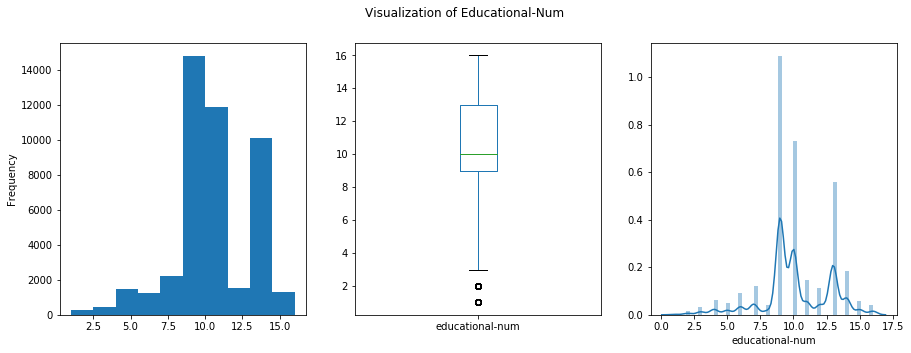

In [65]:
# visualising educational-num column

fig=plt.figure()
fig.suptitle('Visualization of Educational-Num')
plt.subplot(1,3,1)
dfx['educational-num'].plot(kind='hist',figsize=(15,5));
plt.subplot(1,3,2)
dfx['educational-num'].plot(kind='box');
plt.subplot(1,3,3)
sns.distplot(dfx['educational-num']);

#### 1: As from the result max people having educational-num bw 9.5-11.5
#### 2: There are some outliers present below 2 


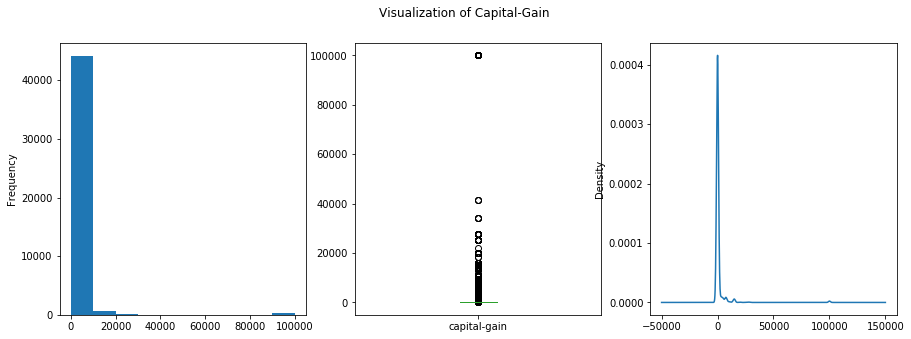

In [13]:
# Visualising Capital-gain column

fig=plt.figure()
fig.suptitle('Visualization of Capital-Gain')
plt.subplot(1,3,1)
dfx['capital-gain'].plot(kind='hist',figsize=(15,5))
plt.subplot(1,3,2)
dfx['capital-gain'].plot(kind='box');
plt.subplot(1,3,3)
dfx['capital-gain'].plot(kind='kde');

#### As we can see Capital-gain is at small no. of people
#### There are large amount of outliers present 

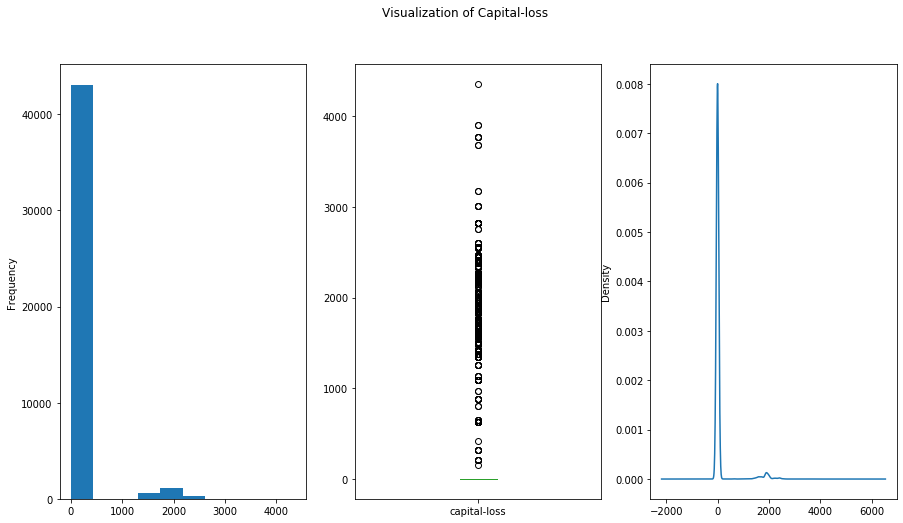

In [66]:
# visualsing Capital-loss column

fig=plt.figure()
fig.suptitle('Visualization of Capital-loss')
plt.subplot(1,3,1)
dfx['capital-loss'].plot(kind='hist',figsize=(15,8));
plt.subplot(1,3,2)
dfx['capital-loss'].plot(kind='box');
plt.subplot(1,3,3)
dfx['capital-loss'].plot(kind='kde');

#### In this we can conclude that the value is rising nearly at 0 to 500
#### there are large no of outliers present 

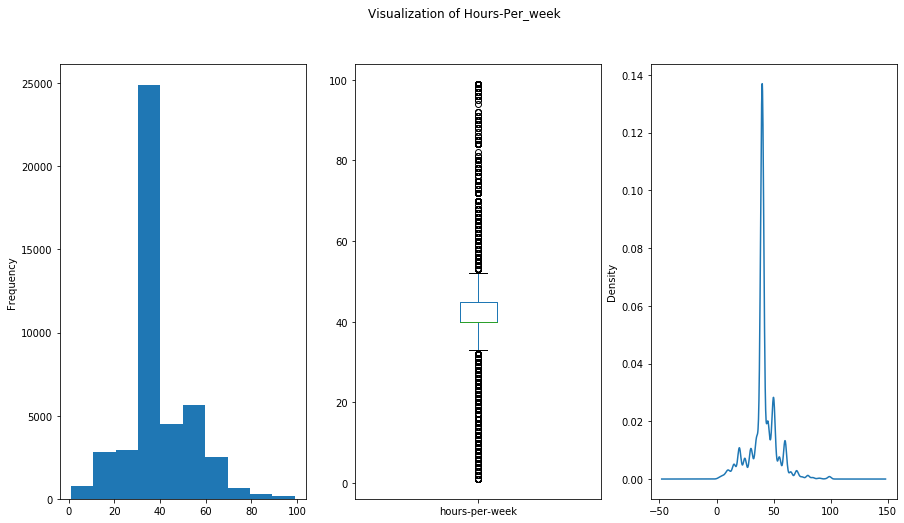

In [67]:
# visualising Hours-per-week column

fig=plt.figure()
fig.suptitle('Visualization of Hours-Per_week')
plt.subplot(1,3,1)
dfx['hours-per-week'].plot(kind='hist',figsize=(15,8));
plt.subplot(1,3,2)
dfx['hours-per-week'].plot(kind='box');
plt.subplot(1,3,3)
dfx['hours-per-week'].plot(kind='kde');

#### There are maximum people of people working nearly  40 hours 
#### as in this the outliers present are at a large in number 

### Categorical Column

Private             73.639858
Self-emp-not-inc     8.387811
Local-gov            6.811024
State-gov            4.302500
Self-emp-inc         3.681341
Federal-gov          3.110136
Without-pay          0.045610
Never-worked         0.021719
Name: workclass, dtype: float64

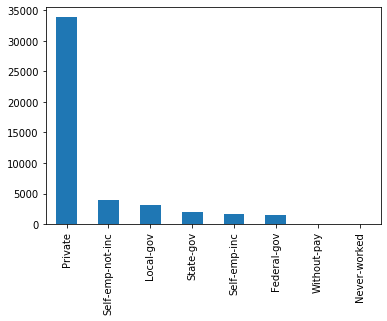

In [16]:
df['workclass'].value_counts().plot(kind='bar')
df['workclass'].value_counts(normalize=True)*100

In [70]:
#### 73% of people are private 
#### people with without-pay amd never-worked are very in less we can say negligible

HS-grad         32.316449
Some-college    22.271815
Bachelors       16.430531
Masters          5.439990
Assoc-voc        4.219729
11th             3.709922
Assoc-acdm       3.277917
10th             2.843864
7th-8th          1.955284
Prof-school      1.707547
9th              1.547848
12th             1.345154
Doctorate        1.216166
5th-6th          1.042136
1st-4th          0.505712
Preschool        0.169936
Name: education, dtype: float64

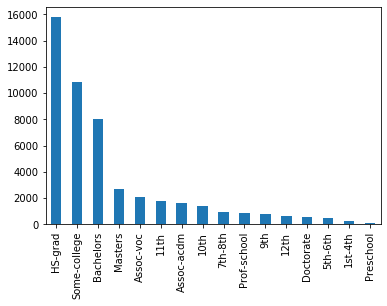

In [17]:
df['education'].value_counts().plot(kind='bar')
df['education'].value_counts(normalize=True)*100

#### there are 32% of people who are high-school graduate
#### There are 22% of people who belong to some colleges

Married-civ-spouse       45.819172
Never-married            32.998239
Divorced                 13.580525
Separated                 3.132550
Widowed                   3.107981
Married-spouse-absent     1.285779
Married-AF-spouse         0.075754
Name: marital-status, dtype: float64

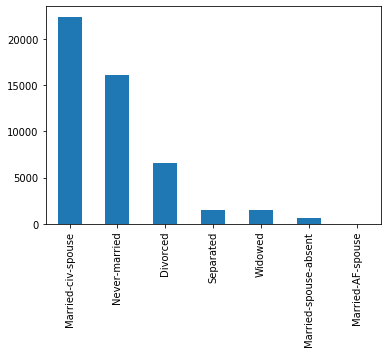

In [18]:
df['marital-status'].value_counts().plot(kind='bar')
df['marital-status'].value_counts(normalize=True)*100

#### with the help of the plot we can sat nearly 50% of people are married
#### The ratio of never married people are 32%

Prof-specialty       13.407773
Craft-repair         13.277431
Exec-managerial      13.220950
Adm-clerical         12.189082
Sales                11.956640
Other-service        10.694502
Machine-op-inspct     6.564856
Transport-moving      5.115895
Handlers-cleaners     4.501119
Farming-fishing       3.236808
Tech-support          3.141225
Protective-serv       2.135425
Priv-house-serv       0.525710
Armed-Forces          0.032585
Name: occupation, dtype: float64

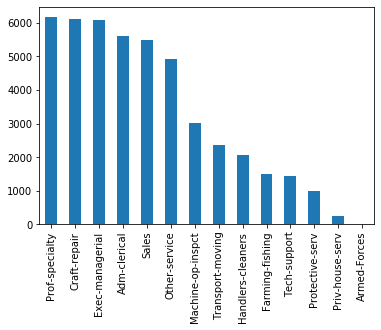

In [19]:
df['occupation'].value_counts().plot(kind='bar')
df['occupation'].value_counts(normalize=True)*100

Husband           40.366897
Not-in-family     25.762663
Own-child         15.521477
Unmarried         10.493018
Wife               4.772532
Other-relative     3.083412
Name: relationship, dtype: float64

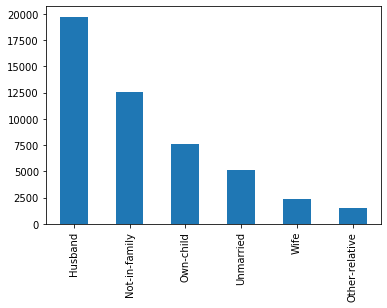

In [20]:
df['relationship'].value_counts().plot(kind='bar')
df['relationship'].value_counts(normalize=True)*100

#### There are 40% men who are married and working 
#### And 25% of people are away from their families

White                 85.504279
Black                  9.592154
Asian-Pac-Islander     3.110028
Amer-Indian-Eskimo     0.962287
Other                  0.831252
Name: race, dtype: float64

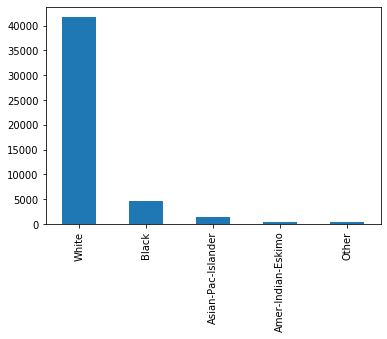

In [21]:
df['race'].value_counts().plot(kind='bar')
df['race'].value_counts(normalize=True)*100

#### most of the working people are white
#### By last the count decreases at large rate

Male      66.848204
Female    33.151796
Name: gender, dtype: float64

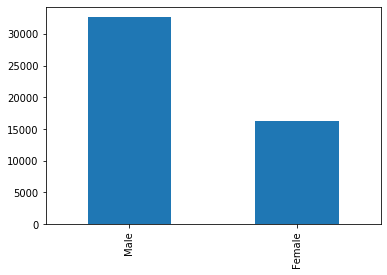

In [22]:
df['gender'].value_counts().plot(kind='bar')
df['gender'].value_counts(normalize=True)*100

#### There are 66% of men working
#### There are 33% of women working

United-States                 91.345212
Mexico                         1.981869
Philippines                    0.614775
Germany                        0.429301
Puerto-Rico                    0.383453
Canada                         0.379285
El-Salvador                    0.323018
India                          0.314682
Cuba                           0.287590
England                        0.264666
China                          0.254246
South                          0.239658
Jamaica                        0.220902
Italy                          0.218818
Dominican-Republic             0.214650
Japan                          0.191727
Guatemala                      0.183391
Poland                         0.181307
Vietnam                        0.179223
Columbia                       0.177139
Haiti                          0.156299
Portugal                       0.139627
Taiwan                         0.135459
Iran                           0.122955
Greece                         0.102115


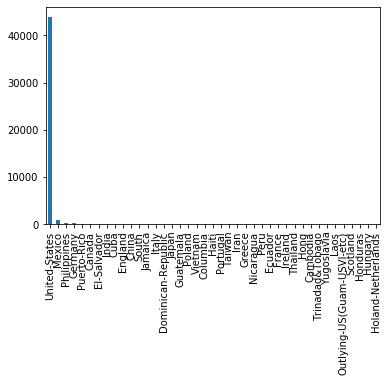

In [23]:
df['native-country'].value_counts().plot(kind='bar')
df['native-country'].value_counts(normalize=True)*100

#### There are 91% of people belongs to United States

<=50K    76.071823
>50K     23.928177
Name: income, dtype: float64

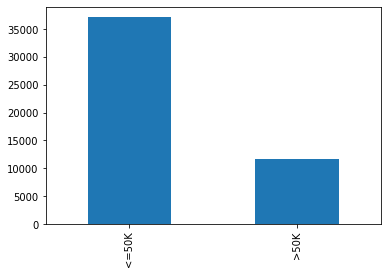

In [73]:
df['income'].value_counts().plot(kind='bar');
df['income'].value_counts(normalize=True)*100

#### there are 76% of people having income less then or equal to 50K
#### There are 235 of people having income more then 50K

# STEP : 5 --  Bivariate Analysis

### Between Numerical Columns

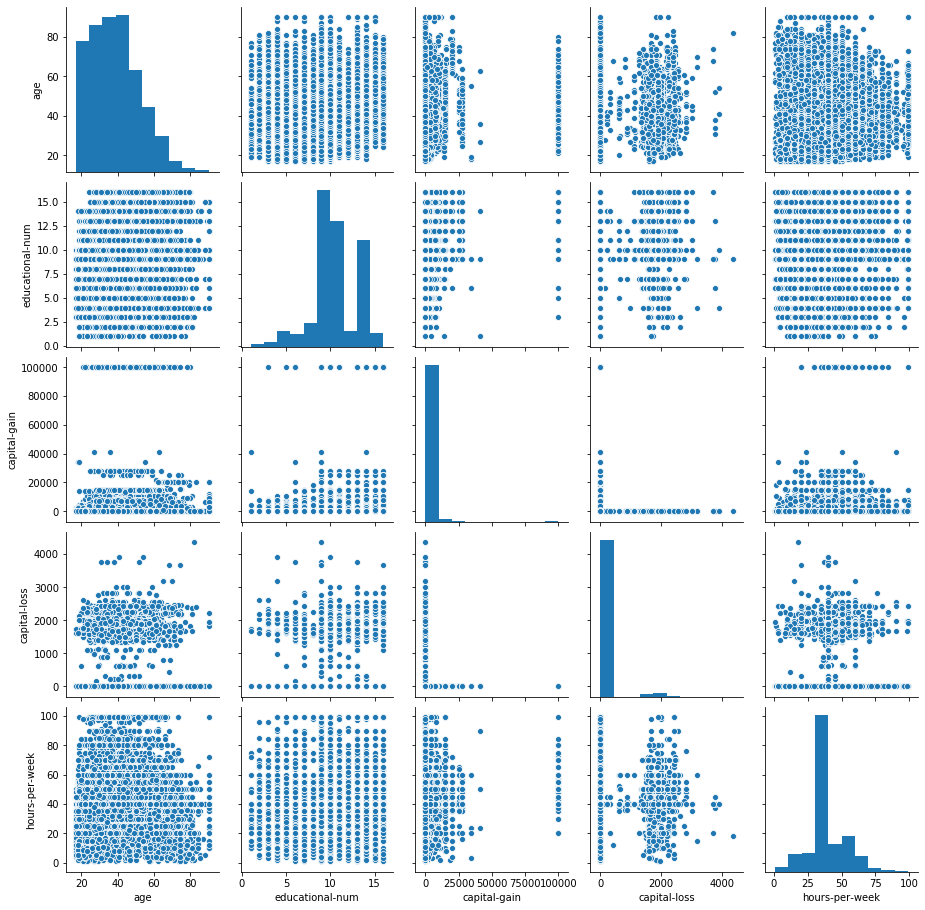

In [74]:
sns.pairplot(dfx);

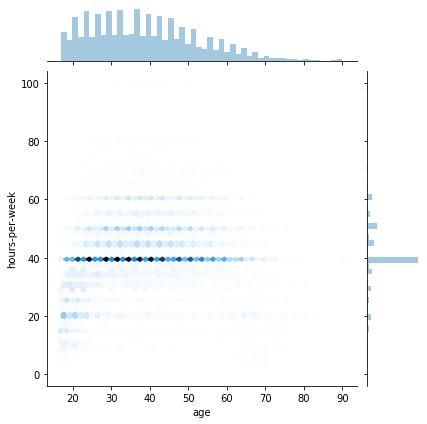

In [75]:
sns.jointplot(df.age,df['hours-per-week'],kind='hex');

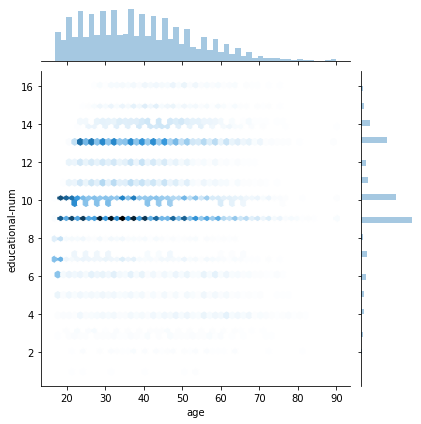

In [76]:
sns.jointplot(df.age,df['educational-num'],kind='hex');

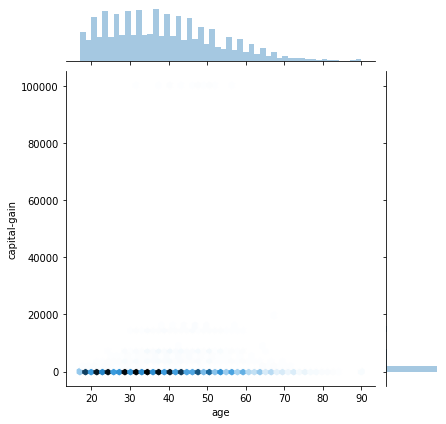

In [77]:
sns.jointplot(df.age,df['capital-gain'],kind='hex');

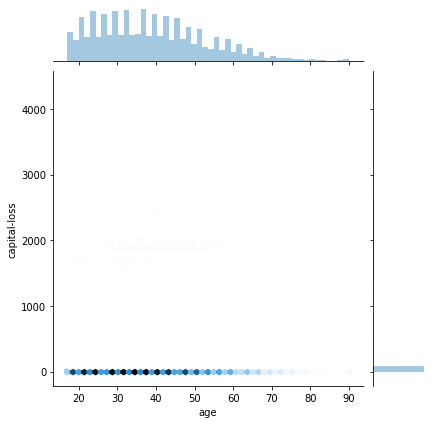

In [78]:
sns.jointplot(df.age,df['capital-loss'],kind='hex');

### Between Numerical and Categorical Column

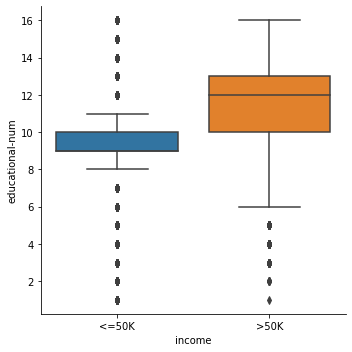

In [79]:
sns.catplot(x='income',y='educational-num',data=df,kind='box');

#### People having education num bw 9-10 have income less then or eual to 50K
#### People having education num bw 10-13 have income more then 50K

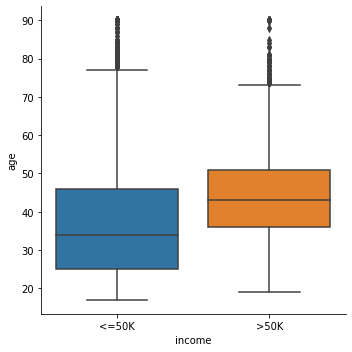

In [80]:
sns.catplot(x='income',y='age',data=df,kind='box');

#### The people earning less or equal to 50K have age bw 26-46
#### The people earning more then 50K have age bw 40-50

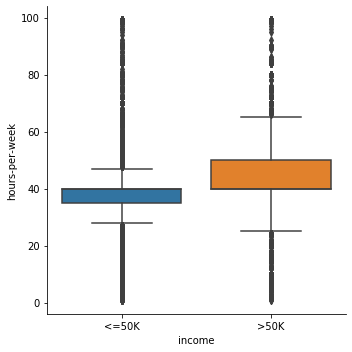

In [49]:
sns.catplot(x='income',y='hours-per-week',data=df,kind='box')

#### The people earning less or equal to 50K work 38-40 hours
#### The people earning more then 50K work 40-50 hours

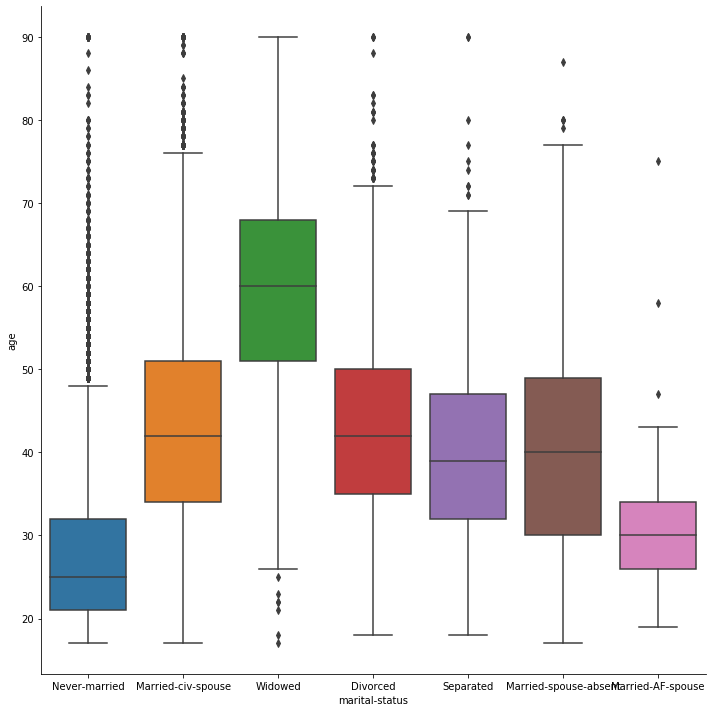

In [52]:
sns.catplot(x='marital-status',y='age',data=df,kind='box',height=10)

#### People who are never married have age bw 23-33
#### people who are married have age bw 35-50
#### People who are divorced have age bw 45-50

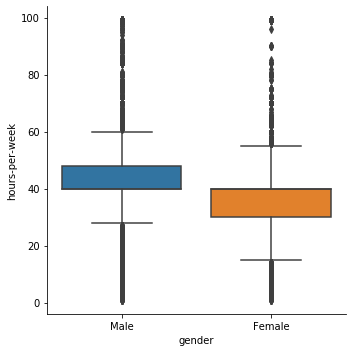

In [82]:
sns.catplot(x='gender',y='hours-per-week',data=df,kind='box');

#### Male are working 40-50 hours 
#### Female are working 30-40 hours

# STEP : 6 -- Conclusion
 ### Mostly people belong to United states
 ### Mostly people working are men 
 ### Most of the people are literate
 ### Most of the people are white in race 
 ### Most of the people are working have age bw 26-46

# Feature Transformation

### Column Normalization:- Numerical column

In [27]:
x=dfx[['age','hours-per-week','capital-gain','capital-loss','educational-num']]
mm=MinMaxScaler()
scaled=mm.fit_transform(x)
normalise=pd.DataFrame(scaled)

In [28]:
nm=normalise.head(10)
nm

,0,1,2,3,4
0,0.109589,0.397959,0.000000,0.0,0.400000
1,0.287671,0.500000,0.000000,0.0,0.533333
2,0.150685,0.397959,0.000000,0.0,0.733333
3,0.369863,0.397959,0.076881,0.0,0.600000
4,0.232877,0.295918,0.000000,0.0,0.333333
5,0.630137,0.316327,0.031030,0.0,0.933333
6,0.095890,0.397959,0.000000,0.0,0.600000
7,0.520548,0.091837,0.000000,0.0,0.200000
8,0.657534,0.397959,0.064181,0.0,0.533333
9,0.260274,0.397959,0.000000,0.0,0.800000


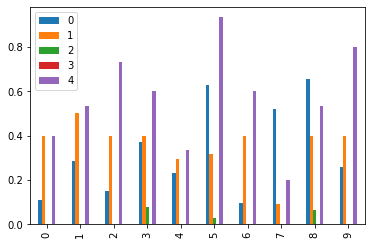

In [29]:
nm.plot(kind='bar')

### Categorical Column

In [30]:
dfx=pd.get_dummies(dfx)

In [31]:
dfx

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
5,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
48838,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
48839,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
48840,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
